# Calibrate baseline

Startup run in 4.392390012741089 secs.


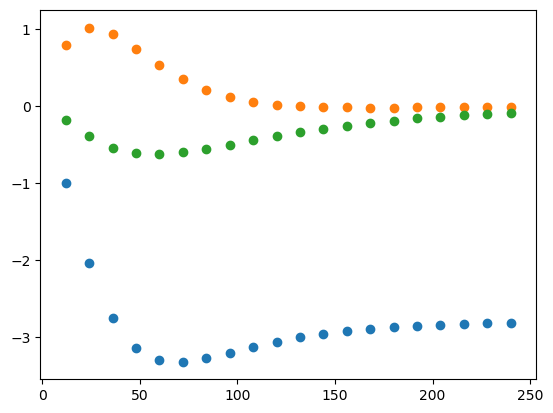

In [1]:
using NBInclude
@nbinclude("startup.ipynb")

In [2]:
function estimate(simpar::SimPar;
        x0 = [79.631263600718, 0.0, 0.07844783149927109, 1.2337220994416365, 0.06449929488793682, 1.4965023959025525],
        lbd= [1, 0, 0, 0, 0, 0], 
        ubd = [200, 0, 1, 100, 10, 10],
        algo = :LN_NELDERMEAD, ## algo :LN_NELDERMEAD :LN_SBPLX :LN_BOBYQA :LN_COBYLA
        maxti=7*60*60, maxev=2000, xtol=1e-2,
        verbose=false, wgt=[1.,1.,1.]) ## true shows the distance at each evaluation)

    Npar=length(x0)
    opt = NLopt.Opt(algo, Npar)      
    maxtime!(opt,maxti)
    maxeval!(opt,maxev)
    xtol_rel!(opt,xtol)
        
    ## bounds and free parameter    
    lower_bounds!(opt, lbd)
    upper_bounds!(opt, ubd)
    println("Optimisation with $Npar parameters,")
    println("   algo: $algo")
    println("   and maximum time: ", round(maxti/3600,digits=3))
    println("   and maximum eval: $maxev")        
    
    
    function obj(vec,g)         
        newp = initial_StrucPar_base(vec[1], vec[2], vec[3], vec[4], vec[5], vec[6])
        out = try
                criterion(moments(simpar, newp), simpar.data, wgt=wgt)  
            catch
                Inf
            end
        return out
    end    
    
    nobs=0
    function obj_verbose(x,g)
        out = obj(x,g)       
        ## check every step
        step = 10
        if (nobs>1) & (div(nobs,step) * step == nobs)
            print("[$(round(x[1],sigdigits=2)),$(round(x[2],sigdigits=2)),$(round(x[3],sigdigits=2))]")
            print(":$(round(out,sigdigits=4))// ")
        end
        nobs += 1
        return(out)
    end
    
    min_objective!(opt,obj)
    verbose ? min_objective!(opt,obj_verbose) : ()

    println("Initial point: $(x0)")
    (minf,minvec,ret) = NLopt.optimize(opt,x0)
    println("The minimum is reached at ",minf, " with ", ret)
    println("  $minvec")
    return minvec
end

println("One evaluation takes:")
@time let
        newp = initial_StrucPar_base(79.631263600718, 0.0, 0.07844783149927109, 1.2337220994416365, 0.06449929488793682, 1.4965023959025525)
        criterion(moments(simpar, newp), simpar.data) 
end

One evaluation takes:
 11.518710 seconds (11.18 M allocations: 10.291 GiB, 7.07% gc time, 40.12% compilation time)


0.051527284657175106

In [3]:
@time estimate(simpar)

Optimisation with 6 parameters,
   algo: LN_NELDERMEAD
   and maximum time: 7.0
   and maximum eval: 2000
Initial point: [79.631263600718, 0.0, 0.07844783149927109, 1.2337220994416365, 0.06449929488793682, 1.4965023959025525]
The minimum is reached at 0.051527284657175106 with XTOL_REACHED
  [79.631263600718, 0.0, 0.07844783149927109, 1.2337220994416365, 0.06449929488793682, 1.4965023959025525]
697.061926 seconds (235.93 M allocations: 659.293 GiB, 8.59% gc time, 0.02% compilation time)


6-element Vector{Float64}:
 79.631263600718
  0.0
  0.07844783149927109
  1.2337220994416365
  0.06449929488793682
  1.4965023959025525